In [132]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [60]:
df = pd.read_csv('C:/USERS/YASHN/BASEBALL DATASET.CSV')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [61]:
df.head

<bound method NDFrame.head of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26 

In [62]:
df.shape

(30, 17)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [65]:
# Checking the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

We can see that there are no null values in our dataset

<function matplotlib.pyplot.show(close=None, block=None)>

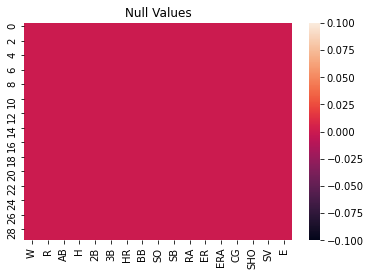

In [66]:
# plotting heatmap
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>],
       [<AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>,
        <AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>,
        <AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplo

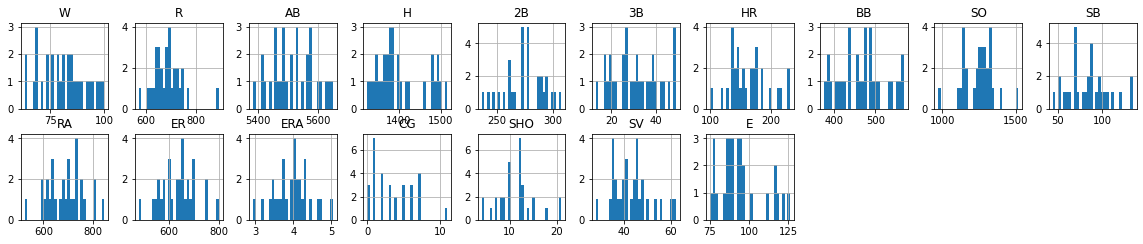

In [12]:
# plotting a histogram
df.hist(figsize=(20,20), grid = True, layout = (10,10), bins = 30)

In [67]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:xlabel='R', ylabel='Density'>

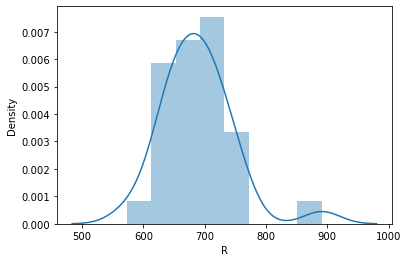

In [68]:
# Graphical representation of all the columns
sns.distplot(df['R'])

<AxesSubplot:xlabel='AB', ylabel='Density'>

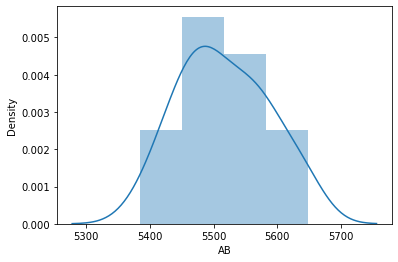

In [12]:
sns.distplot(df['AB'])

<AxesSubplot:xlabel='H', ylabel='Density'>

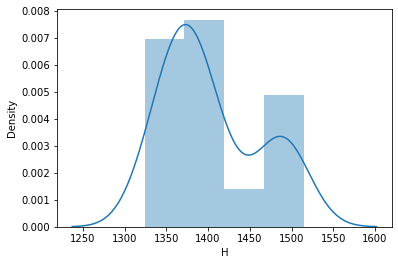

In [13]:
sns.distplot(df['H'])

<AxesSubplot:xlabel='2B', ylabel='Density'>

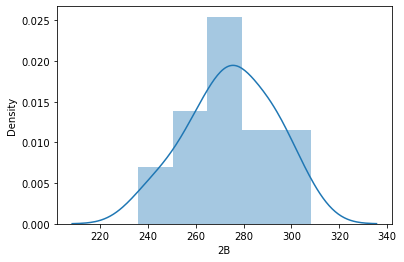

In [14]:
sns.distplot(df['2B'])

<AxesSubplot:xlabel='3B', ylabel='Density'>

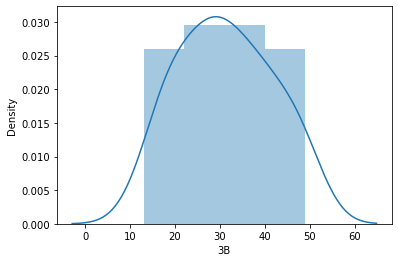

In [16]:
sns.distplot(df['3B'])

<AxesSubplot:xlabel='HR', ylabel='Density'>

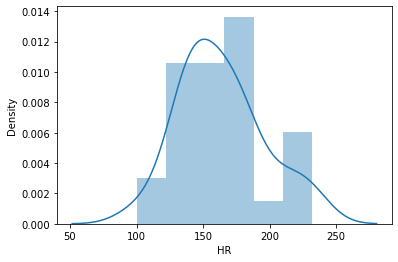

In [17]:
sns.distplot(df['HR'])

<AxesSubplot:xlabel='BB', ylabel='Density'>

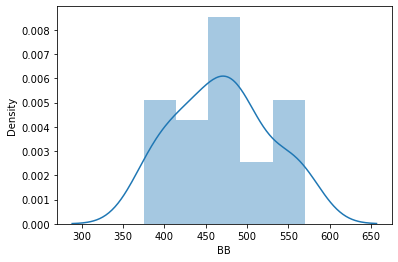

In [18]:
sns.distplot(df['BB'])

<AxesSubplot:xlabel='SO', ylabel='Density'>

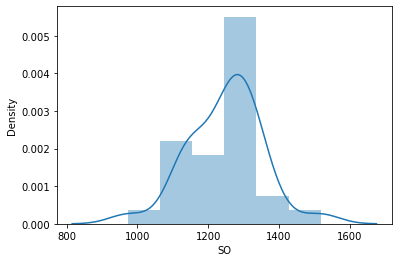

In [19]:
sns.distplot(df['SO'])

<AxesSubplot:xlabel='SB', ylabel='Density'>

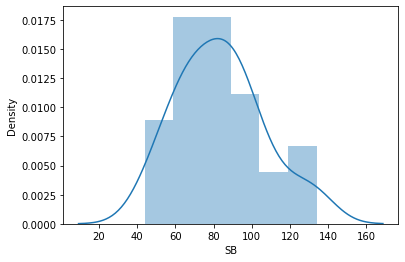

In [20]:
sns.distplot(df['SB'])

<AxesSubplot:xlabel='RA', ylabel='Density'>

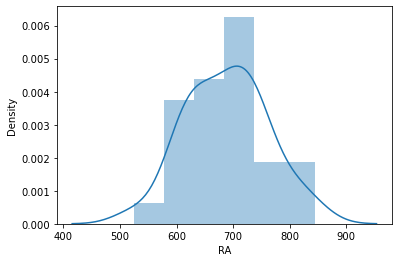

In [21]:
sns.distplot(df['RA'])

<AxesSubplot:xlabel='ER', ylabel='Density'>

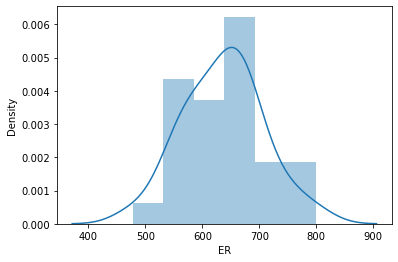

In [22]:
sns.distplot(df['ER'])

<AxesSubplot:xlabel='ERA', ylabel='Density'>

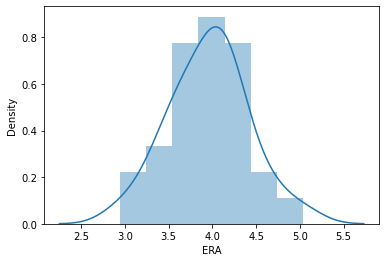

In [23]:
sns.distplot(df['ERA'])

<AxesSubplot:xlabel='CG', ylabel='Density'>

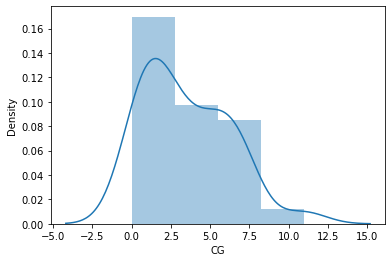

In [24]:
sns.distplot(df['CG'])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

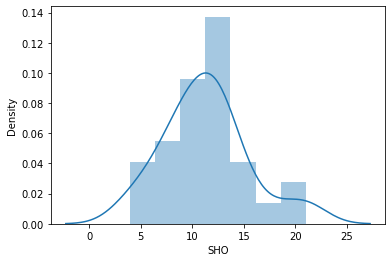

In [25]:
sns.distplot(df['SHO'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

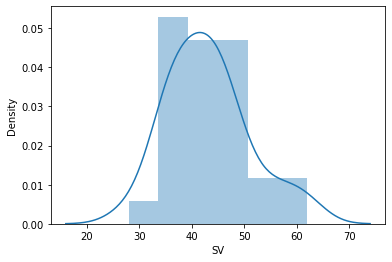

In [26]:
sns.distplot(df['SV'])

<AxesSubplot:xlabel='E', ylabel='Density'>

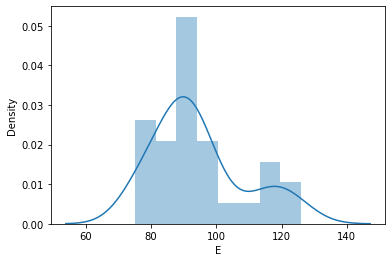

In [27]:
sns.distplot(df['E'])

<Figure size 1800x1440 with 0 Axes>

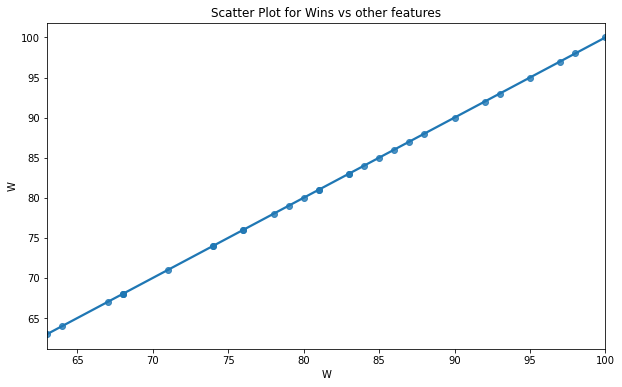

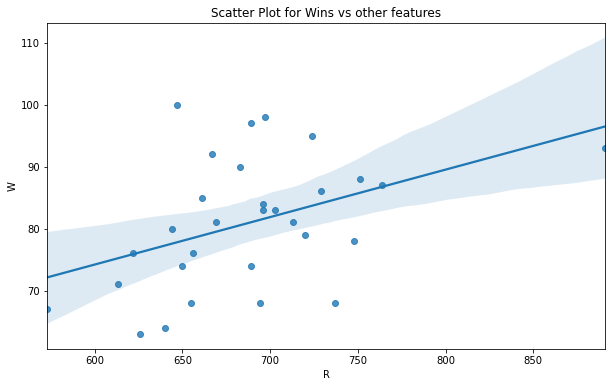

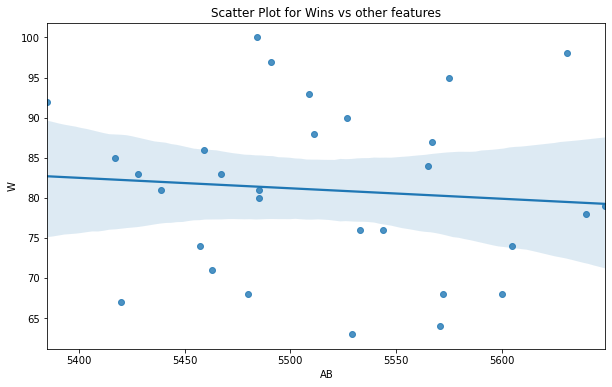

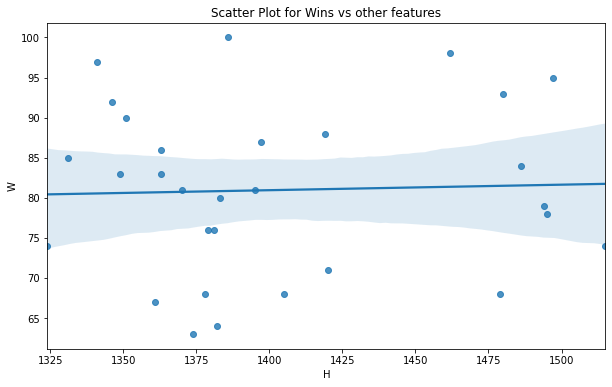

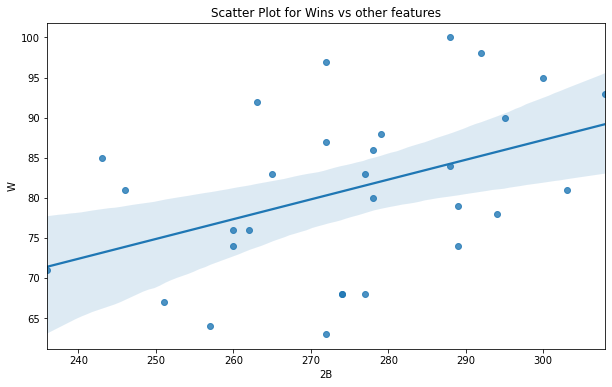

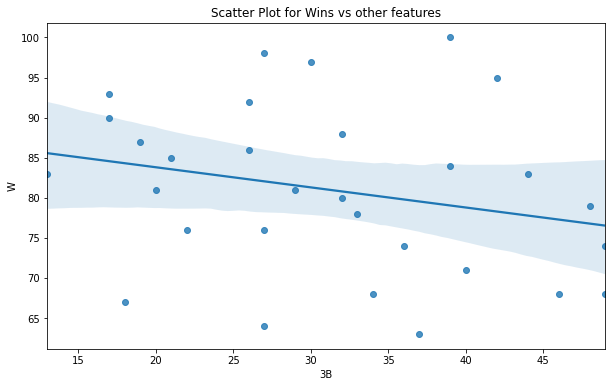

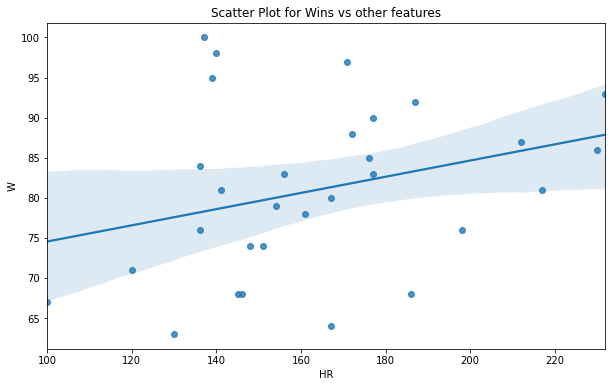

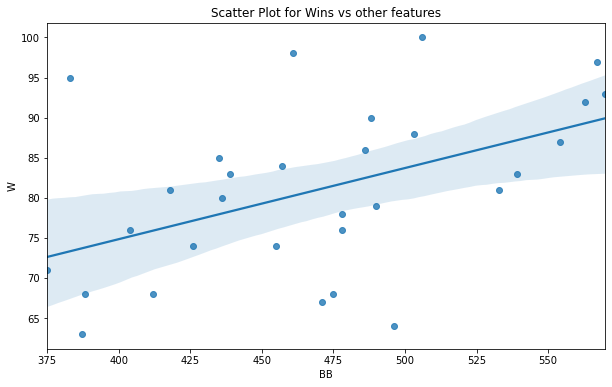

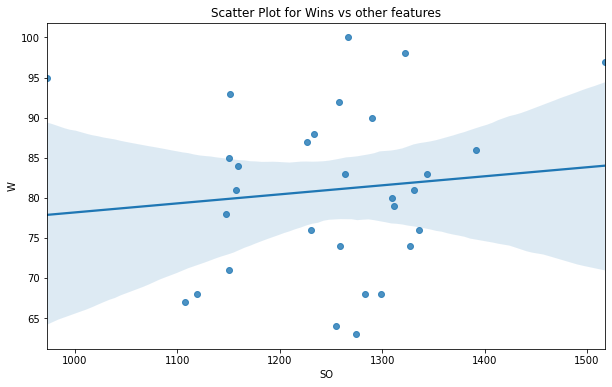

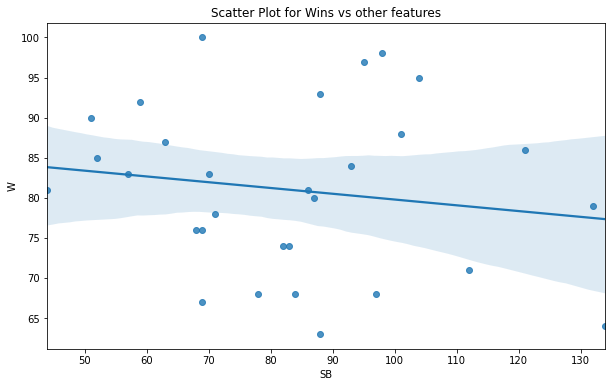

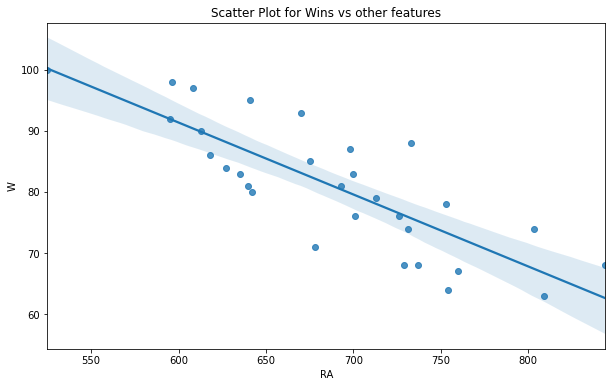

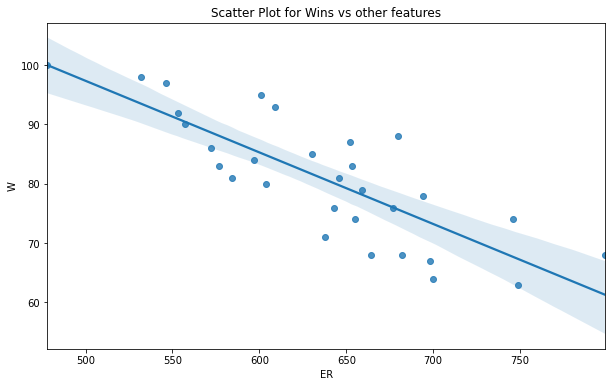

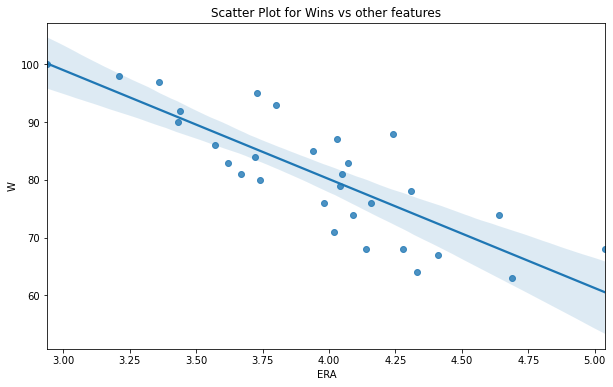

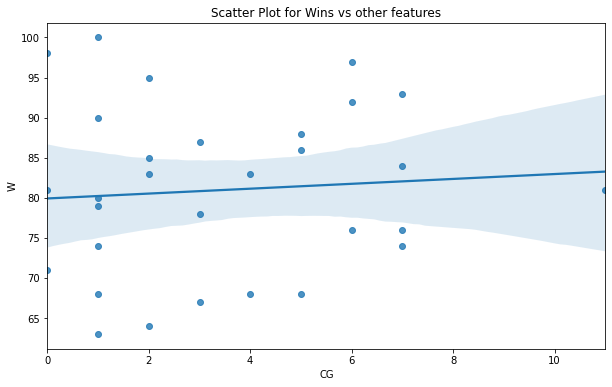

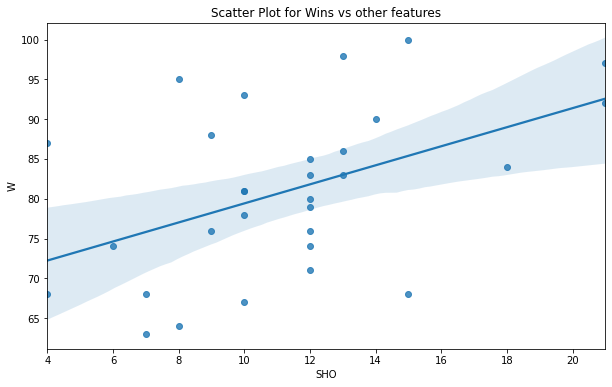

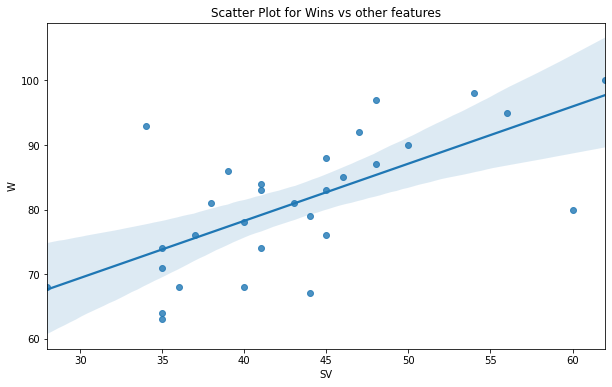

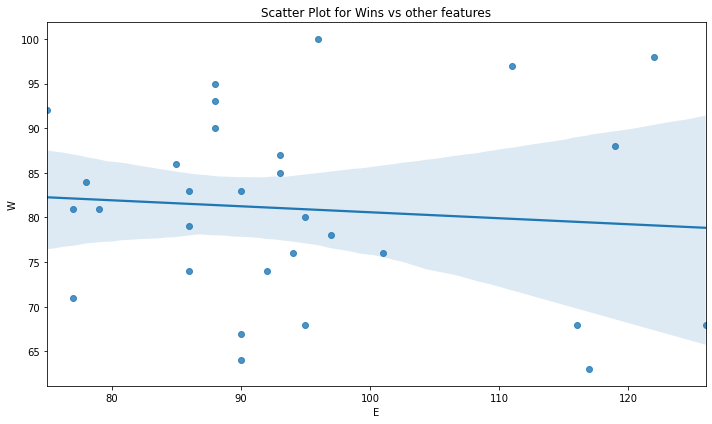

In [10]:
# Plotting scatterplot of target column Wins with other variables
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'])
        plt.title('Scatter Plot for Wins vs other features')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

In [11]:
# Checking Correlation
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [99]:
# Checking Correlation
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

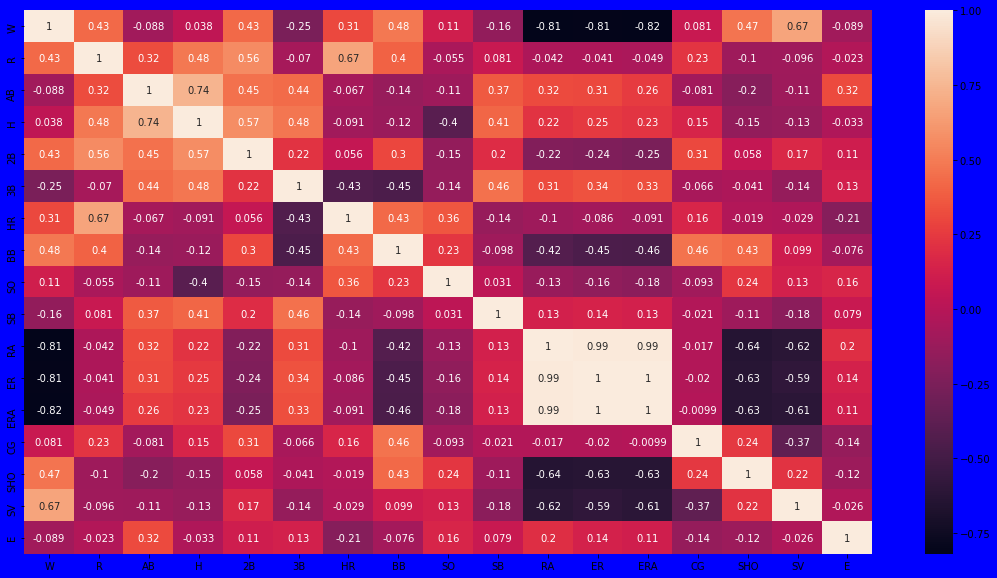

In [69]:
# Plotting heatmap
plt.figure(figsize=[19,10],facecolor='blue')
sns.heatmap(df.corr(),annot=True)

Observations from the above graphs(distplot and Scatterplot) and correlation heatmap, we can see that:
             1. Run and win are linearly correlated
             2. At balls is very weekly related to Wins
             3. Hits are also very weekly related to winning
             4. Doubles are linearly related with Wins and is skewed to left
             5. Triple has very weak negative correlations with win and is skewed to right
             6. The home run has a very low correlation with wins and data is right-skewed
             7. Walk is lightly correlated to win
             8. Strikeout is not correlated to win and the dataset is left-skewed.
             9. Stolen Bases is not correlated to win
             10.Runs Allowed is highly correlated to win 
             11.Earned Runs is highly correlated to win
             12.Earned Run Average (ERA) is not correlated to win and data is right-skewed.
             13.Shutouts are highly correlated to win and data is right-skewed.
             14.Saves are lightly correlated to win 
             15.Errors are not correlated to win and data is right-skewed.
             


In [70]:
# Statistical Summary
df.describe()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [71]:
# Checking Skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

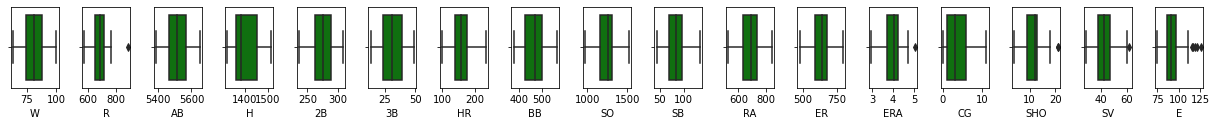

In [13]:
# Checking Outliers
collist=df.columns.values
ncol=17
nrows=30
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

From the above boxplots, we can see that there are outliers in Runs(R),ERA,SHO,SV and E

In [72]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z


array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [73]:
threshold=3
print(np.where(z<3))

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 13, 1

In [74]:
z[6][8]


0.20781158041435616

In [75]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [76]:
df_new.shape

(29, 17)

In [77]:
# Checking the percentage of loss data
loss_percent =(30-29)/30*100
print(loss_percent)

3.3333333333333335


After removing the outliers with the help of z score method, we can see that the percentage of loss data is 3.33% 

In [78]:
df_new.skew().sort_values()

2B    -0.335304
SO    -0.233815
R     -0.215364
ERA    0.016693
RA     0.018155
ER     0.018461
3B     0.090124
W      0.119013
BB     0.151193
AB     0.169573
HR     0.450862
SB     0.494966
SHO    0.526943
SV     0.627480
H      0.783772
E      0.840271
CG     0.854980
dtype: float64

There is a skewness in columns H,SHO,SV,E and CG

In [79]:
# Removing Skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)

In [80]:
df_new["H"]=np.log1p(df_new["H"])

In [81]:
# Rechecking the skewness
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

<AxesSubplot:xlabel='CG', ylabel='Density'>

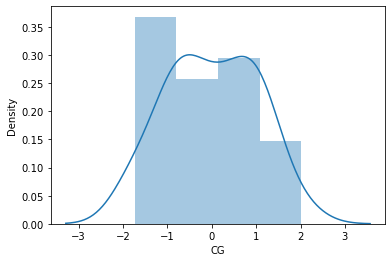

In [82]:
# Rechecking the skewness of the particular columns by graphical representation
# plotting a distplot 
sns.distplot(df_new['CG'])

<AxesSubplot:xlabel='H', ylabel='Density'>

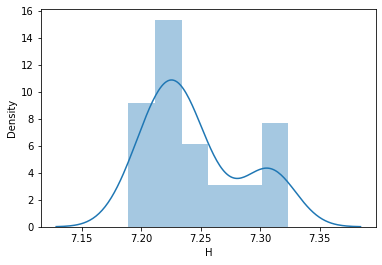

In [83]:
sns.distplot(df_new['H'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

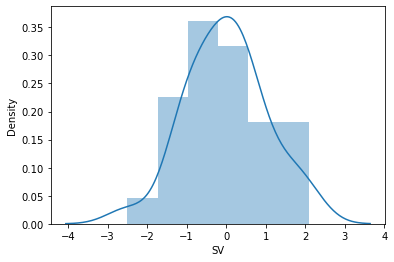

In [48]:
sns.distplot(df_new['SV'])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

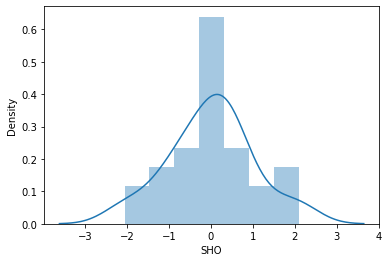

In [49]:
sns.distplot(df_new['SHO'])

<AxesSubplot:xlabel='E', ylabel='Density'>

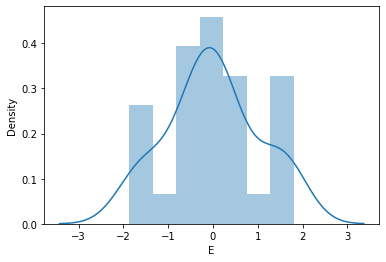

In [50]:
sns.distplot(df_new['E'])

From the above plots , we can see that there are no skewness in the columns.

In [84]:
x = df_new.drop("W",axis=1)
y = df_new["W"]

In [85]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [86]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.770649,-0.513555,0.312020,1.554265


In [87]:
# Checking multicollinearity using VIF
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,7.112342,R
1,20.237195,AB
2,10.114607,H
3,3.528059,2B
4,3.227808,3B
5,8.736960,HR
6,3.324550,BB
7,2.811546,SO
8,1.955254,SB
9,200.826177,RA


In [88]:
# Here, we can see multicollinearity in the columns RA , ER and ERA
#Droping those columns
X = X.drop(["ER", "ERA"],axis=1)

In [89]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.264463,0.236737,-1.149165,-0.540820


In [90]:
# ReChecking multicollinearity using VIF
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,6.019438,R
1,5.210230,AB
2,7.728111,H
3,3.165732,2B
4,2.981242,3B
5,6.168639,HR
6,3.053363,BB
7,2.287734,SO
8,1.773119,SB
9,4.759240,RA


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=90)

In [92]:
x_train.shape

(19, 16)

In [93]:
y_train.shape

(19,)

In [94]:
x_test.shape

(10, 16)

In [95]:
y_test.shape

(10,)

In [141]:
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))
cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

MSE: 258.609091853533
MAE: 13.096952770642975
r2_score: -0.5046423198763124
Cross Validation Score: 5.091679106033169


In [134]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.9983816123712789


In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          63       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         0
          74       0.00      0.00      0.00         0
          76       0.25      1.00      0.40         1
          79       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         2
          83       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         1
          90       0.00      0.00      0.00         1

    accuracy                           0.10        10
   macro avg       0.02      0.09      0.04        10
weighted avg       0.03      0.10      0.04        10



In [105]:
# Using lasso regressor
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8954668848345482

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          63       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         0
          74       0.00      0.00      0.00         0
          76       0.25      1.00      0.40         1
          79       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         2
          83       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         1
          90       0.00      0.00      0.00         1

    accuracy                           0.10        10
   macro avg       0.02      0.09      0.04        10
weighted avg       0.03      0.10      0.04        10



In [106]:
# Using Ridge Regressor
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9626671973479791

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          63       0.00      0.00      0.00         1
          67       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         0
          74       0.00      0.00      0.00         0
          76       0.25      1.00      0.40         1
          79       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         2
          83       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         1
          90       0.00      0.00      0.00         1

    accuracy                           0.10        10
   macro avg       0.02      0.09      0.04        10
weighted avg       0.03      0.10      0.04        10



In [157]:
#Using 
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.9967079826072028

In [169]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [160]:
# Hyperparameter Tuning 
#Using AdaBoostRegressor
fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

In [161]:
GSCV = GridSearchCV(AdaBoostRegressor(), fmod_param, cv=5)

In [162]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]})

In [163]:
GSCV.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 50, 'random_state': 104}

In [165]:
# Saving The Model
import pickle
file = 'Baseball Case Study.pkl'
#save file
save = pickle.dump(AdaBoostRegressor,open(file,'wb'))

In [168]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,68,56.361010
1,63,37.740558
2,84,72.693425
3,81,67.549127
4,83,56.760837
5,76,83.582186
6,79,81.894261
7,81,76.949925
8,90,62.967401
9,67,68.515363


To Conclude, We can say that AdaBoostRegressor has the best accuracy of 99 %